TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

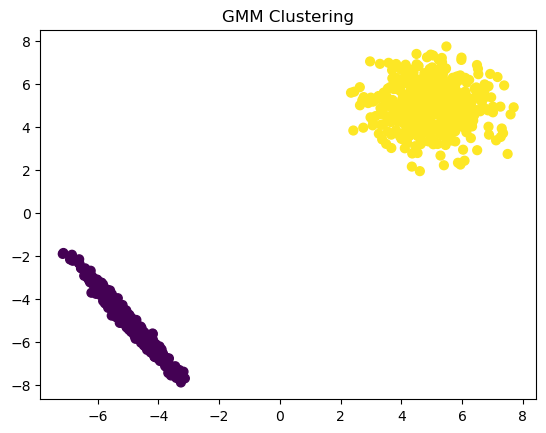

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# 生成示例数据
np.random.seed(0)
n_samples = 500

# 两个高斯分布
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 5])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0.6, -0.8], [-0.4, 0.8]])) + np.array([-5, -5])

# 合并数据
X = np.vstack([shifted_gaussian, stretched_gaussian])

# 用 GMM 进行聚类
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

# 绘制数据点及其对应的标签
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
plt.title('GMM Clustering')

# 绘制高斯成分的等高线
def plot_gaussian_ellipsoid(mean, cov, ax, color='red'):
    v, w = np.linalg.eigh(cov)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi
    ell = Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

ax = plt.gca()

# 绘制每个高斯成分
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    plot_gaussian_ellipsoid(pos, covar, ax)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()